In [2]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, hamming_loss, precision_score

In [3]:
%load_ext autoreload
%autoreload 2

from utils.DataClass import ProcessDNNTSPFile, ProcessSFCNTSPFile,ProcessGP, DataClass, get_masked, get_thresholded
from utils.Analysis import ModelComparison, Metric
from utils.Analysis import avg_size_of_pred_set,  plot_label_distribution, kl_divergence, plot_probas_distribution, get_label_frequencies 

# DunnHumby analysis

In [4]:
dataset_name = 'DunnHumby'

In [5]:
 # кастомный класс для загрузки и предобработки в нужный формат
 # создан по правилам описаным в readme
dunnhumby_sfcntsp = ProcessSFCNTSPFile(dataset_name)
dunnhumby_sfcntsp = DataClass(dunnhumby_sfcntsp)

In [6]:

dunnhumby_dnntsp = ProcessDNNTSPFile(dataset_name)
# передаю наследника класса processed dataset в DataClass
dunnhumby_dnntsp = DataClass(dunnhumby_dnntsp)


In [9]:
dunnhumby_gp = ProcessGP(dataset_name)
dunnhumby_gp = DataClass(dunnhumby_gp)

In [10]:
# В инициализатор класса ModelComparison
# передаем обьекты DataClass, от разных моделей на одном датасете, которые мы хотим сравнивать
# Во время инициализации произойдет проверка того что данные получены из одного датасета
# И соотвествующие сообщения будут распечатаны
test_comp = ModelComparison(dunnhumby_dnntsp, dunnhumby_sfcntsp, dunnhumby_gp)

/home/andrey/.conda/envs/MIPT_ML_Neychev_36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrey/.conda/envs/MIPT_ML_Neychev_36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrey/.conda/envs/MIPT_ML_Neychev_36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrey/.conda/envs/MIPT_M

Experiments performed on dataset with common name
Gt frequencies are equal between experiments
Max set sizes are equal between datasets
Ground truth set sizes distributions are equal
All checks are succesful


/home/andrey/.conda/envs/MIPT_ML_Neychev_36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrey/.conda/envs/MIPT_ML_Neychev_36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrey/.conda/envs/MIPT_ML_Neychev_36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrey/.conda/envs/MIPT_M

In [11]:
# Здесь нужно определить два массива с метриками которые вы хотите взять
# metric_list - Это метрики которые считаются в постановке multilabel
# metric_list_for_labels - метрики которые считаются в постановке бинарной классификации
# массив metric_list_for_labels нужен для построение метрик per label

# в эти массивы вы передаете:
# 1. обьект функции метрики
# 2. 'pred_labels' или 'probas' в зависимости от того с чем работает метрика
# дело в том, что под капотом зашита своя стратегия выбора порогов, вместо взятия 
# обычного 0.5, которое делает sklearn, если передать ему вероятности, а не сами лейблы
# - именнованным аргументом name передаете как назвать метрику(для отображения на графиках)
# если этот параметр не передать, по умолчанию будет взят
# metric_func + str(kwargs)
# - далее передаете желаемые аргументы kwargs, которые вы можете захотеть подставить в
# саму метрику. Например, передавая параметр average=<...> в инициализатор
# при вызове соотвествующей метрики, этот параметр будет подставлен



metric_list = [
    Metric(f1_score, 'pred_labels', name='weighted f1', average='weighted'),
    Metric(roc_auc_score, 'probas', name='weighted ROC AUC', average='weighted'),
    Metric(hamming_loss, 'pred_labels')
]

metric_list_for_labels = [
    Metric(accuracy_score, 'pred_labels'),
    Metric(precision_score, 'pred_labels')
]

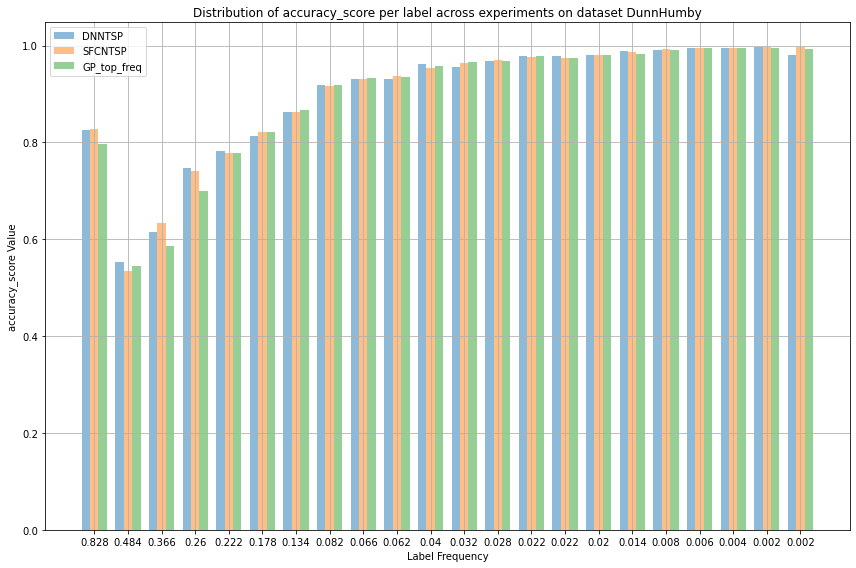

/home/andrey/.conda/envs/MIPT_ML_Neychev_36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrey/.conda/envs/MIPT_ML_Neychev_36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrey/.conda/envs/MIPT_ML_Neychev_36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrey/.conda/envs/MIPT_M

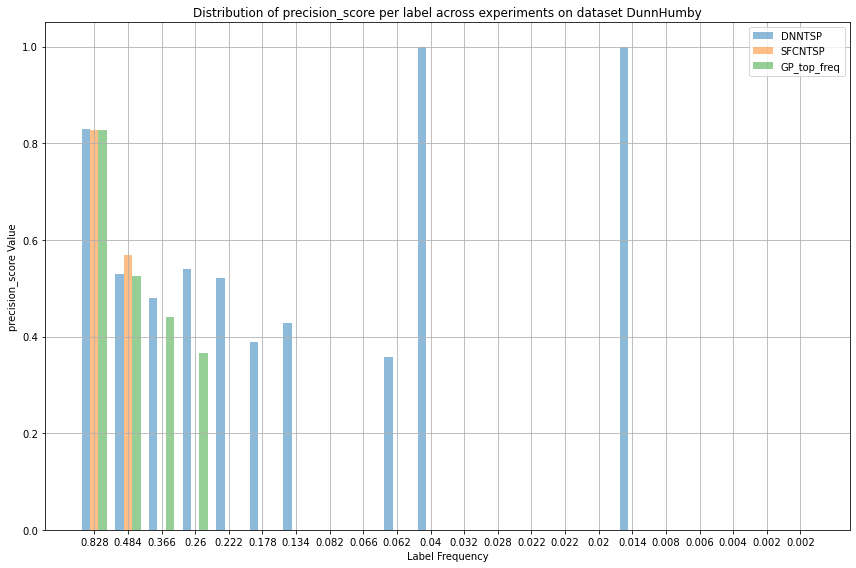

22


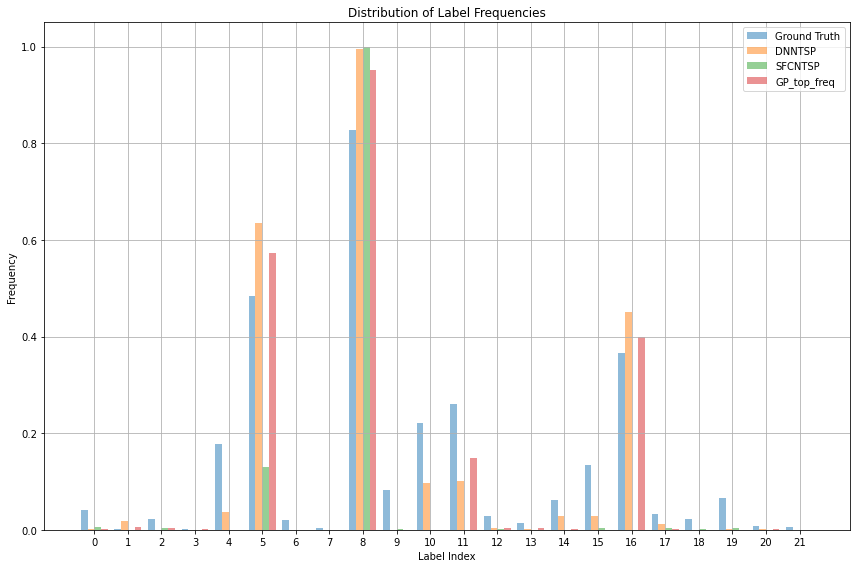

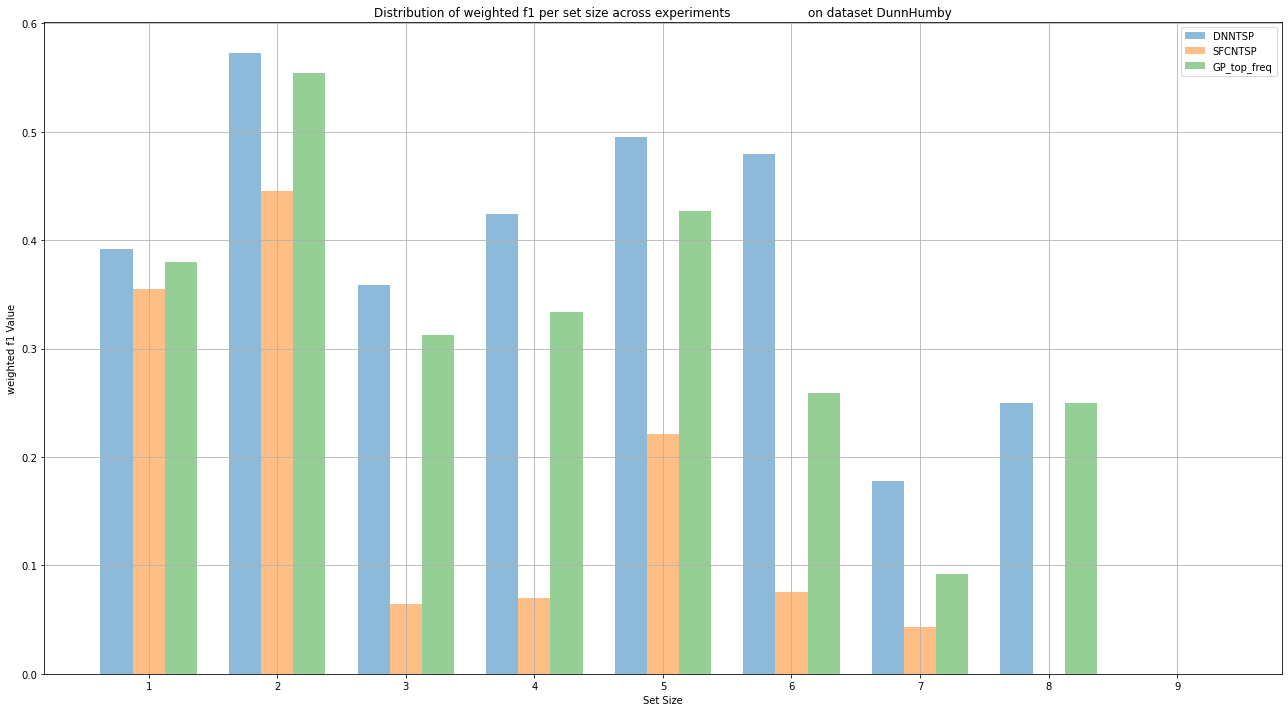

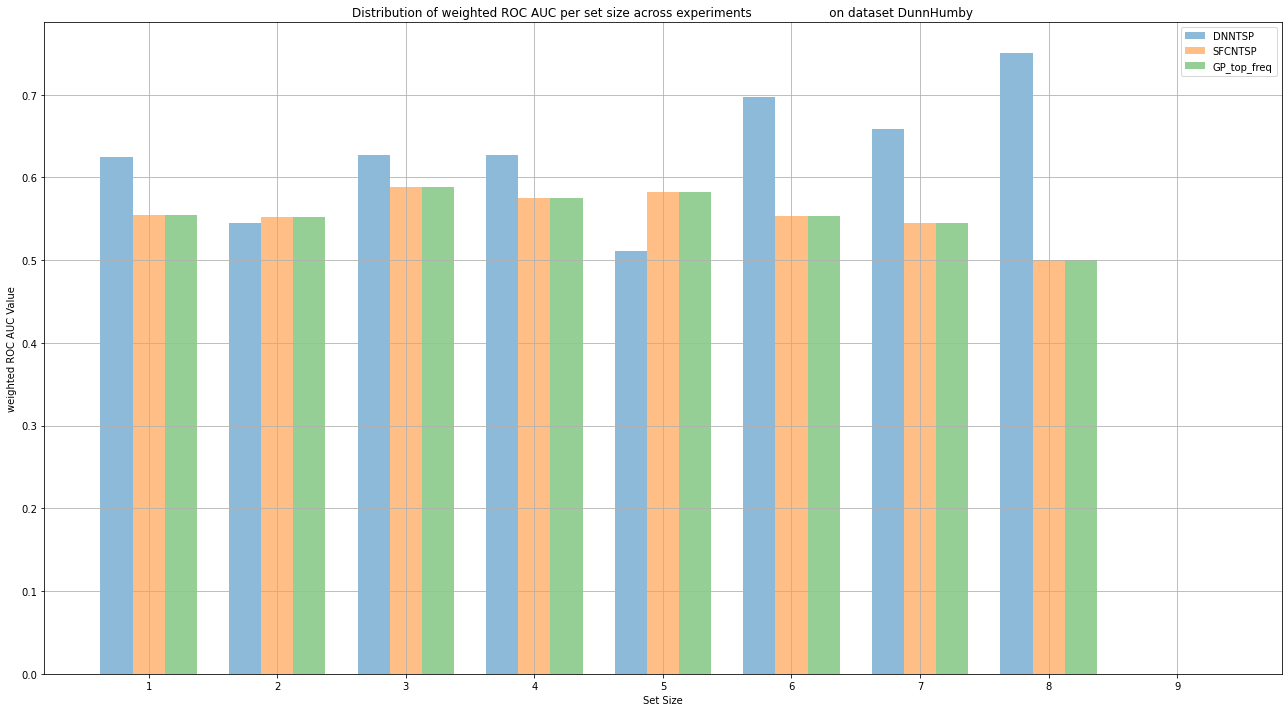

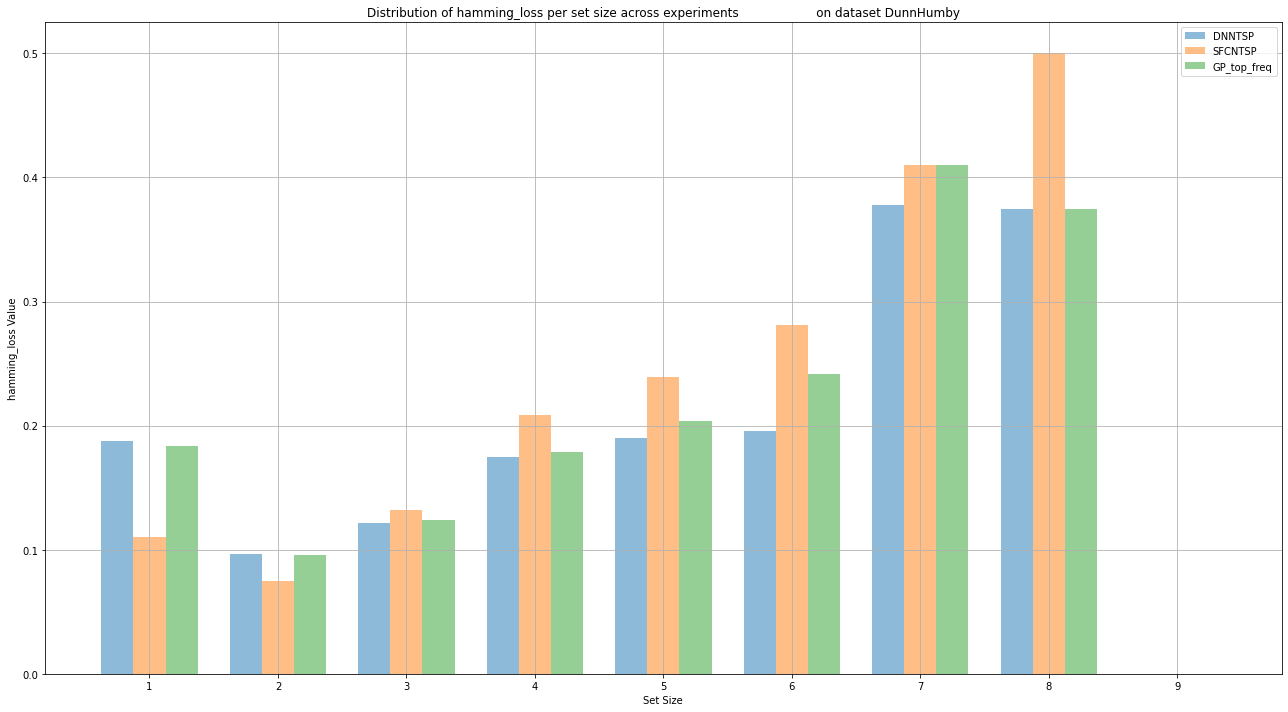

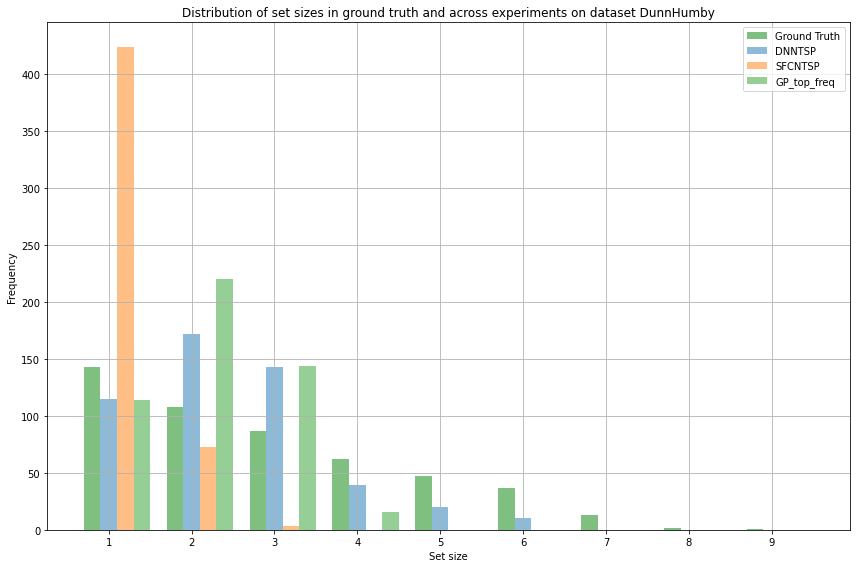

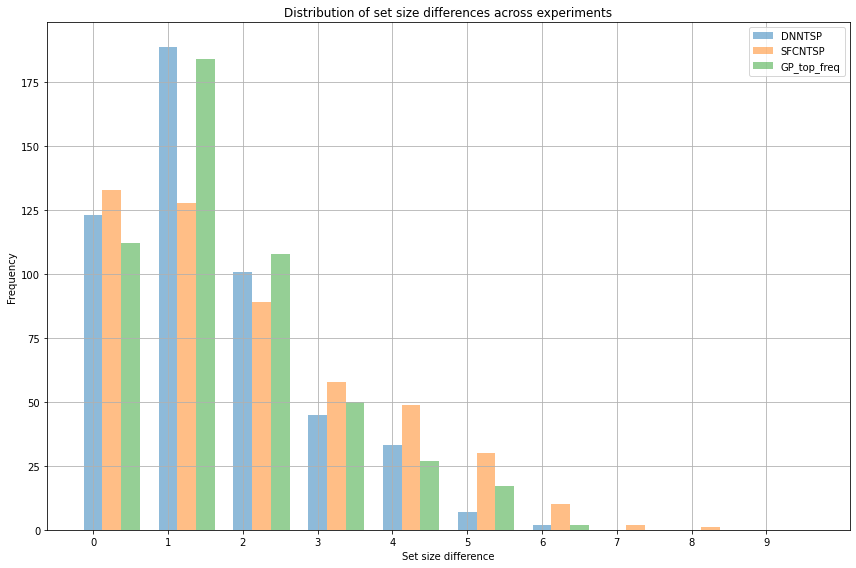

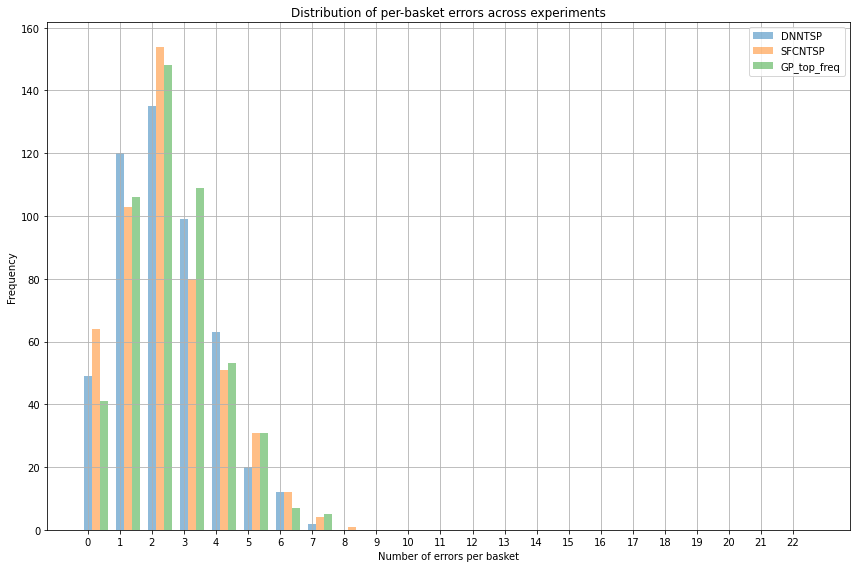

,DNNTSP,SFCNTSP,GP_top_freq
weighted f1,0.501614,0.300748,0.432032
weighted ROC AUC,0.656215,0.575629,0.575629
hamming_loss,0.102273,0.101636,0.106636


In [13]:
# У обьекта класса ModelComparison вызываете метод evaluate_and_save
# он построит все графики, посчитает метрики и сохранит их
# при подсчете будут использованы метрики,  которые вы перечислили в массивах выше
# также есть именованные параметры show и save
# show отвечает за вывод графиков(при False, графики не будут выведены),
# нужен чтобы не засорять вывод если нужно
# save отвечает за сохранение


test_comp.evaluate_and_save(metric_list, metric_list_for_labels, figsize=(12,8),show=True)